Filippo Nardi (100519009)</br>
Jaime Martínez (100451397)

# First optimization practice

### Logistic problem

# so i worked i did some things
The first optimization problem consists in the selection of different offers from some logistic companies to satisfy the demand of a certain board game we manufacture and commercialize

In order to approach the generated problem, it is first necessary to generate the data with the one we will work

We will assume for now that the demand of the board game provided by our factories is fully satisfied, so that we can focus on our problem of selecting the offers that the logistics company provided us so that we can minimize the budget spent in this paragraph

#### But we might enter in dfferent scenarios of not satisfying the demand later</br>

In [69]:
# Imports
# Checking that it works
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [70]:
random.seed(33)
demand = random_numbers = [random.randint(400, 500) for _ in range(52)]
for i in range(43, 52): demand[i] += random.randint(50, 100)
for i in [0, 1]: demand[i] += random.randint(75, 100)

In order to get some feasible demand, which in a real problem it would be given as predictions for the following year, we have used the randint() function for some variation during the weeks, whose output is always the same after having set a seed before. The demand predictions have also been subjected to some increase as we get closer to Christmas weeks, for obvious reasons, since the amount of toys sold during those dates are always greater than during the rest of the year

Since the output is always the same, we thought that it could be better if we gave the possibility of generating a completely random output, which is achieved by the following cell of code when uncommented (we recommend to do so after a first iteration of the problem using the predefined demand)

In [71]:
# # Uncomment all code for random values in demand

# mu, sigma = 500, 25 # mean and standard deviation of the normal used
# weeks = 52 # weeks in a year
# demand = np.random.normal(mu, sigma, weeks)

# counter = 0 # This variable is created to reflect the increasing amount of sales inversely proportional to time left before Christmas
# multiplier = 15 # This value will be the responsible to increase the demand on the previous weeks to Christmas
# for i in range(41, 52):
#     demand[i] += abs(np.random.normal(counter * multiplier, 10)) # We assume a more or less linear increasing in November and December
#     counter += 1
#     
# for i in [0, 1]: demand[i] += np.random.normal(counter * multiplier, 10)
# #print(demand)

# # The following lines of code just converts all values to integers for a more realist approach
# # It also makes sure that no value drops below the lowerbound imposed
# lowerbound = mu - 50
# for i in range(weeks): 
#     if demand[i] < lowerbound: 
#         demand[i] = lowerbound
#     else:
#         demand[i] = int(demand[i])

Then, it would be best if we could visualize the data obtained just to check that the predicted demand is feasible in real world, which in this case, seems that could happen in a real scenario, in where sales increase in November, December and the first weeks of January due to Christmas holidays and keeping the sales more or less stable during the rest of the year

[560, 508, 480, 429, 435, 461, 483, 468, 467, 423, 483, 478, 464, 441, 487, 467, 461, 456, 436, 486, 481, 409, 438, 452, 439, 466, 463, 406, 495, 477, 494, 486, 454, 435, 440, 471, 497, 487, 431, 415, 407, 440, 436, 509, 475, 565, 496, 487, 566, 533, 567, 516]


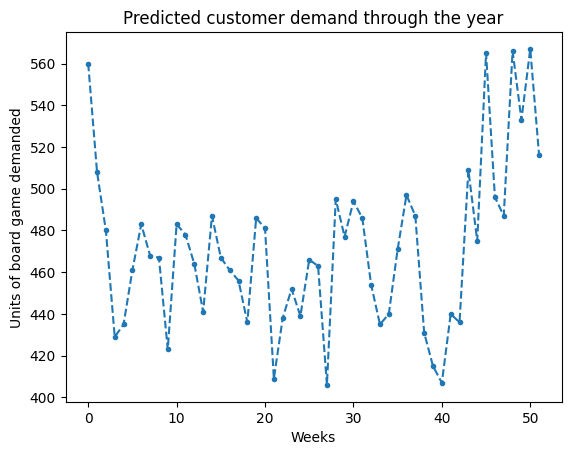

In [72]:
print(demand)
plt.plot(demand, marker = ".", linestyle = "--")
plt.title("Predicted customer demand through the year")
plt.xlabel("Weeks")
plt.ylabel("Units of board game demanded")
plt.show()

Since the demand is now fulfilled and we have checked that the values are more or less feasible, then it is time for knowing the possible offers we could purchase. In order to be able to distribute our manufactured goods throughout Spain, we have contacted three different logistics companies, which have offered us the following traits:

#### Company A: 
- 5 trucks to hire in four consecutive weeks: 350€
- 1 truck to hire in four consecutive weeks: 80€</br>Notice that the consecutive weeks are selected somewhat in multiples of four, which means that we can choose an offer from week 1 to week 4, another one from week 5 to week 8, but we cannot hire a truck to work from week 3 to week 7
- 2 trucks for two consecutive weeks during October or November: 105€
- 2 trucks for two consecutive weeks during December or January: 120€
- 3 trucks for just one week during either December or January: 120€

#### Company B:
- ##### Add more when finished the problem

In [73]:
"""
def consecutiveList(start, stop, weeks):
    auxl = list(np.zeros(weeks))
    for i in range(weeks):
        if i >= start and i < stop:
            auxl[i] = 1
        else:
            auxl[i] = int(auxl[i])
    return auxl
#print(consecutiveList(3, 6, 9))


A = []
for _ in range(weeks):
    A.append(list(np.zeros(weeks)))
print(A)
"""

'\ndef consecutiveList(start, stop, weeks):\n    auxl = list(np.zeros(weeks))\n    for i in range(weeks):\n        if i >= start and i < stop:\n            auxl[i] = 1\n        else:\n            auxl[i] = int(auxl[i])\n    return auxl\n#print(consecutiveList(3, 6, 9))\n\n\nA = []\nfor _ in range(weeks):\n    A.append(list(np.zeros(weeks)))\nprint(A)\n'

In [89]:
df = pd.read_csv("us2021census.csv")
df["Longitude"] = df["Longitude"].apply(lambda x: float(x))
df["Latitude"] = df["Latitude"].apply(lambda x: float(x))
df_sorted = df.sort_values(by = "Population", ascending = False)
df_sorted.head(10)

,City,State,Type,Counties,Population,Latitude,Longitude
0,New York,NY,City,Bronx;Richmond;New York;Kings;Queens,8804190,40.714,-74.007
1,Los Angeles,CA,City,Los Angeles,3898747,34.052,-118.243
2,Chicago,IL,City,Cook;DuPage,2746388,41.882,-87.628
3,Houston,TX,City,Harris;Fort Bend;Montgomery,2304580,29.760,-95.363
4,Phoenix,AZ,City,Maricopa,1608139,33.448,-112.074
5,Philadelphia,PA,City,Philadelphia,1603797,39.952,-75.164
6,San Antonio,TX,City,Bexar,1434625,29.423,-98.490
7,San Diego,CA,City,San Diego,1386932,32.716,-117.165
8,Dallas,TX,City,Rockwall;Denton;Kaufman;Dallas;Collin,1304379,32.781,-96.797
9,San Jose,CA,City,Santa Clara,1013240,37.336,-121.891


In [ ]:
chicago = [df.loc[df["City"] == "Chicago"]["Longitude"].values[0], df.loc[df["City"] == "Chicago"]["Latitude"].values[0]]
houston = [df.loc[df["City"] == "Houston"]["Longitude"].values[0], df.loc[df["City"] == "Houston"]["Latitude"].values[0]]

print(math.dist(chicago, houston))

#### Possible constraints

1.: It is necessary to select more than ¿3? offers of a certain company to reach an agreement with it (it is not possible to purchase just one or two offers from the same company)

2.: There is a limit of offers provided by the different companies

3.: 

#### Possible first addendum to the optimization problem

We can distribute the different demand along ¿four? cities (Madrid, Barcelona, Sevilla and Bilbao) and we have to minimize the fuel consumption by applying optimization considering our ¿three? factories (Leganés, La Coruña and Zaragoza)

To do so, it would be best to assign an upperbound of goods that a certain factory can manufacture (for example, Leganés can produce up to 50% of the total amount of goods, La Coruña around 30% and Zaragoza around 40%. Notice that the % exceed from suming up 100% so that optimization can be applied). It would also be necessary to get the distance from each factory to each city to compute the fuel consumption (minimize fuel consumption = minimize distance)



###### Possible extra (which we should ask Ricardo to apply it since I dont see it, it is just an idea I got xd): We could maybe select different kinds of trucks to move the goods from factories to destinations, whether they are diesel or petrol (which affect on the price of moving the goods from factories to cities since the different fuels have different pricings). For example, company A provides only diesel trucks, company B only petrol trucks and company C has two offers of diesel and three of petrol trucks